In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
abc=pd.read_csv("bank-full.csv")
abc

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
abc['job']=abc['job'].astype('category')
abc['marital']=abc['marital'].astype('category')
abc['education']=abc['education'].astype('category')
abc['default']=abc['default'].astype('category')
abc['housing']=abc['housing'].astype('category')
abc['loan']=abc['loan'].astype('category')
abc['contact']=abc['contact'].astype('category')
abc['poutcome']=abc['poutcome'].astype('category')
abc['Target']=abc['Target'].astype('category')
abc['month']=abc['month'].astype('category')

In [4]:
abc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [5]:
def fn(x):
    abc[x]=abc[x].replace('unknown',0)
fn('job')
fn('education')
fn('contact')
fn('poutcome')
abc.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
0                 288
Name: job, dtype: int64

In [6]:
def fn(y):
    abc[y]=abc[y].replace('blue-collar',1)
    abc[y]=abc[y].replace('management',2)
    abc[y]=abc[y].replace('technician',3)
    abc[y]=abc[y].replace('admin.',4)
    abc[y]=abc[y].replace('services',5)
    abc[y]=abc[y].replace('retired',6)
    abc[y]=abc[y].replace('self-employed',7)
    abc[y]=abc[y].replace('entrepreneur',8)
    abc[y]=abc[y].replace('unemployed',9)
    abc[y]=abc[y].replace('housemaid',10)
    abc[y]=abc[y].replace('student',11)

In [7]:
fn('job')

In [8]:
abc.job.value_counts()

1     9732
2     9458
3     7597
4     5171
5     4154
6     2264
7     1579
8     1487
9     1303
10    1240
11     938
0      288
Name: job, dtype: int64

In [9]:
abc.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [10]:
def fn(i):
    abc[i]=abc[i].replace('married',1)
    abc[i]=abc[i].replace('single',2)
    abc[i]=abc[i].replace('divorced',3)


In [11]:
fn('marital')

In [12]:
abc.marital.value_counts()

1    27214
2    12790
3     5207
Name: marital, dtype: int64

In [13]:
abc.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
0             1857
Name: education, dtype: int64

In [14]:
def fn(j):
    abc[j]=abc[j].replace('secondary',1)
    abc[j]=abc[j].replace('tertiary',2)
    abc[j]=abc[j].replace('primary',3)
fn('education')
abc.education.value_counts()

1    23202
2    13301
3     6851
0     1857
Name: education, dtype: int64

In [15]:
abc.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [16]:
def fn(k):
    abc[k]=abc[k].replace('no',1)
    abc[k]=abc[k].replace('yes',2)
fn('default')
abc.default.value_counts()

1    44396
2      815
Name: default, dtype: int64

In [17]:
abc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [18]:
abc.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [19]:
def fn(l):
    abc[l]=abc[l].replace('no',1)
    abc[l]=abc[l].replace('yes',2)
fn('housing')
abc.housing.value_counts()

2    25130
1    20081
Name: housing, dtype: int64

In [20]:
abc.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [21]:
def fn(m):
    abc[m]=abc[m].replace('no',1)
    abc[m]=abc[m].replace('yes',2)
fn('loan')
abc.loan.value_counts()

1    37967
2     7244
Name: loan, dtype: int64

In [22]:
abc.contact.value_counts()

cellular     29285
0            13020
telephone     2906
Name: contact, dtype: int64

In [23]:
def fn(n):
    abc[n]=abc[n].replace('cellular',1)
    abc[n]=abc[n].replace('telephone',2)
fn('contact')
abc.contact.value_counts()

1    29285
0    13020
2     2906
Name: contact, dtype: int64

In [24]:
abc.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [25]:
def fn(o):
    abc[o]=abc[o].replace('jan',1)
    abc[o]=abc[o].replace('feb',2)
    abc[o]=abc[o].replace('mar',3)
    abc[o]=abc[o].replace('apr',4)
    abc[o]=abc[o].replace('may',5)
    abc[o]=abc[o].replace('jun',6)
    abc[o]=abc[o].replace('jul',7)
    abc[o]=abc[o].replace('aug',8)
    abc[o]=abc[o].replace('sep',9)
    abc[o]=abc[o].replace('oct',10)
    abc[o]=abc[o].replace('nov',11)
    abc[o]=abc[o].replace('dec',12)
fn('month')
abc.month.value_counts()

5     13766
7      6895
8      6247
6      5341
11     3970
4      2932
2      2649
1      1403
10      738
9       579
3       477
12      214
Name: month, dtype: int64

In [26]:
abc.poutcome.value_counts()

0          36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [27]:
def fn(p):
    abc[p]=abc[p].replace('failure',1)
    abc[p]=abc[p].replace('success',2)
    abc[p]=abc[p].replace('other',3)
fn('poutcome')
abc.poutcome.value_counts()

0    36959
1     4901
3     1840
2     1511
Name: poutcome, dtype: int64

In [28]:
abc.Target.value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [29]:
def fn(q):
    abc[q]=abc[q].replace('no',0)
    abc[q]=abc[q].replace('yes',1)
fn('Target')
abc.Target.value_counts()

0    39922
1     5289
Name: Target, dtype: int64

In [30]:
abc['job']=pd.to_numeric(abc['job'],errors='coerce')
abc['marital']=pd.to_numeric(abc['marital'],errors='coerce')
abc['education']=pd.to_numeric(abc['education'],errors='coerce')
abc['default']=pd.to_numeric(abc['default'],errors='coerce')
abc['housing']=pd.to_numeric(abc['housing'],errors='coerce')
abc['loan']=pd.to_numeric(abc['loan'],errors='coerce')
abc['month']=pd.to_numeric(abc['month'],errors='coerce')
abc['poutcome']=pd.to_numeric(abc['poutcome'],errors='coerce')
abc['Target']=pd.to_numeric(abc['Target'],errors='coerce')
abc['contact']=pd.to_numeric(abc['contact'],errors='coerce')
abc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  Target     45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


In [31]:
X=abc.drop('Target', axis= 1)
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,2,1,2,1,2143,2,1,0,5,5,261,1,-1,0,0
1,44,3,2,1,1,29,2,1,0,5,5,151,1,-1,0,0
2,33,8,1,1,1,2,2,2,0,5,5,76,1,-1,0,0
3,47,1,1,0,1,1506,2,1,0,5,5,92,1,-1,0,0
4,33,0,2,0,1,1,1,1,0,5,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,1,2,1,825,1,1,1,17,11,977,3,-1,0,0
45207,71,6,3,3,1,1729,1,1,1,17,11,456,2,-1,0,0
45208,72,6,1,1,1,5715,1,1,1,17,11,1127,5,184,3,2
45209,57,1,1,1,1,668,1,1,2,17,11,508,4,-1,0,0


In [32]:
Y=abc[['Target']]
Y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

In [35]:
model = LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
pre=model.predict(X)
pre

array([0, 0, 0, ..., 1, 0, 1])

In [37]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(Y,pre)
cf

array([[39029,   893],
       [ 4161,  1128]])

In [38]:
model.score(X_train ,Y_train)

0.8857395645716813

In [39]:
from sklearn.metrics import classification_report
print(classification_report(Y,pre))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.56      0.21      0.31      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.60      0.62     45211
weighted avg       0.86      0.89      0.87     45211



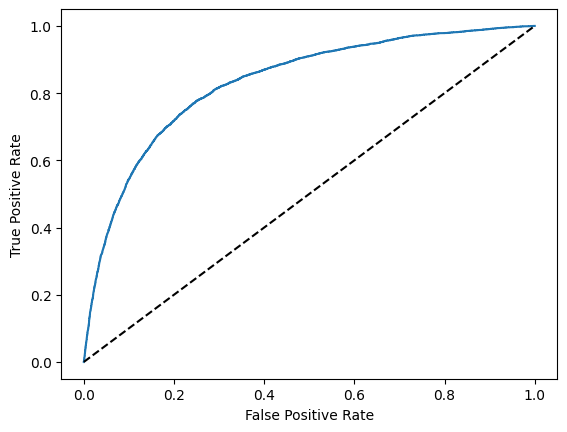

auc: 0.595452


In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

pre=model.predict(X)
fpr, tpr, thresholds = roc_curve(Y, model.predict_proba(X)[:,1])
auc=roc_auc_score(Y,pre)

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)')
plt.plot([0, 1], [0, 1],'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()
print('auc:',np.round(auc,6))